# Demonstration for the presolar grain workshop 2015

_ ***Note for ANITA summer school lab students:*** Unfortunately not all aspects of this demo are working right now, but the notebooks gives you and idea of what is possible if you are interested in pre-solar grain research. Contact Reto Trappitsch, our NuGrid grain expert, if you want to see this demo fixed rather sooner than later._

**For the NuGrid team: Reto Trappitsch, January 25, 2015**

Here I am gonna demonstrate some capabilities of the NuGrid tools for beginners, especially tuned to the presolar grain community. We will explore some stars from the stellar evolution code MESA using the mesa.py tool, browse the nucleosynthetic NuGrid output from a multizone calculation using nugridse.py, as well as filter out some presolar grains from the St. Louis database (http://presolar.wustl.edu/~pgd) and compare these grains with NuGrid models.
This is a iPython Notebook. To run the code for yourself, click into a line and hit Shift+Enter to execute. Note that this notebook is interpreted, i.e., if you did not load the nugridse.py file in the beginning, you will not be able to executes commands of that class. So start at the beginning and go through the notebook! I will use standard python comments to explain single lines and more nicely looking comments to add helpful information to various steps.

In [36]:
# First we will load the python tools to analyze NuGrid and MESA output
from nugridpy import mesa as ms
from nugridpy import nugridse as mp
%matplotlib nbagg
from matplotlib.pyplot import *


# Now we use these tools to set the appropriate path to the CADC server for NuGrid output as well as for MESA output
ms.set_nugrid_path('/data/nugrid_vos')
mp.set_nugrid_path('/data/nugrid_vos')


# set path for initial abundance file
iniabufile = '/data/nugrid_vos/data/supplements/iniab2.0E-02GN93.ppn'
# set folder to presolar grain database
fol2gdb = '/data/nugrid_vos/data/supplements/validation/grain_data/'

We have now loaded successfully the nugridse and mesa tools. We also set the paths to the CADC server that is mounted on this machine permanently in the given folder.
Now the next thing to do is load some stars. We want to load a two solar mass star with solar metallicity for demonstration purposes. Let us load the mesa output into the variable m2se and the post processed output into the variables m2pp_out for the whole star and m2pp for the surface abundances only.

In [37]:
m2se = ms.star_log(mass=2.,Z=0.02)
m2pp_out = mp.se(mass=2., Z=0.02, output='out')
m2pp = mp.se(mass=2.,Z=0.02, output='surf')

nugrid_path = /data/nugrid_vos
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/nugrid_vos
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.Closing plot_tools

nugrid_path = /data/nugrid_vos
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


## Stellar evolution output

Now that all the data are loaded we can start playing with them and explore the star. The sphinx documentation of the NuGrid tools will show you what functions are available and what they can actually do. You can find the documentation at http://nugridpy.phys.uvic.ca
m2se.

and then hit the tab button. That will give you a drop down menu with all the commands that are available. If you then type for example

m2se.hrd_new?

you will get a help file describing this function.

Let us first have a look at the stellar evolution output and check out the HRD

Note that you can also get help by typing

and hit the tab button. That will give you a drop down menu with all the commands that are available. If you then type for example

you will get a help file describing this function

Let us first now have a look at the HRD diagram of the star. This is part of the stellar evolution output.

In [68]:
m2se.hrd_new()

We can also have a look at the Kippenhahn diagram of the star.

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map


<IPython.core.display.Javascript object>


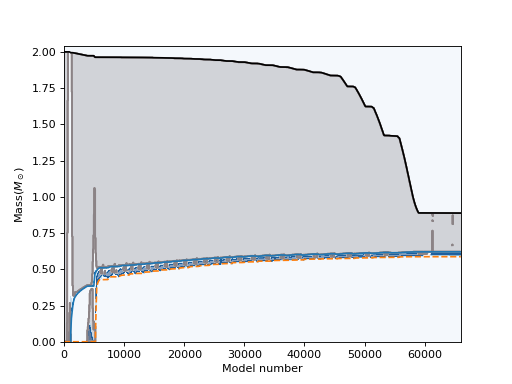

plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [46]:
m2se.kip_cont()

The 'model number' is kind of a random x-axis, however, represents an adaptive time step from the MESA calculation. Therefore, it is the most useful x-axis in order to see something interesting. We can zoom in a bit to isolate one of the thermal pulses:

In [41]:
m2se.kip_cont(modstart=26800,modstop=27800,ylims=[0.54,0.6],engenPlus=False)

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


## Nucleosynthesis output

Now that we played with the stellar evolution output, let us have a look on what is possible with the post-processed nucleosynthesis output. Let us first plot a Mo-98 over the lifetime of the star in model 27400.

<IPython.core.display.Javascript object>


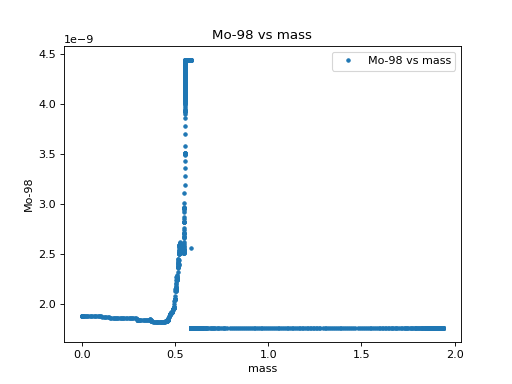

 reading ['mass']...100%0.162508964539


In [45]:
ifig=11;figure(ifig)
m2pp_out.plot('mass','Mo-98',fname=27400)

We do not see much in this figure, let us zoom in a bit.

In [10]:
m2pp_out.plot('mass','Mo-98',fname=27400,limits=[0.57,0.585,1.5e-9,5e-9],show=False)

 reading ['mass']...100%0.128163099289


From mass coordinate 0.56 until 0.58 is the interesting region where we are inside the Mo-98 enrichment. Let us now make a movie over that region with some more isotopes and over all models of interest.

Let us move away from animations and browsing stars and look more into the aspects that the presolar grain community might be interested in.

## NuGrid and Presolar grains

First of all, many plots that we are used to in the presolar grain community can be done within the NuGrid framework. For example if we want to do a silicon three isotope plot, we can simply run the following command using the surface data.

In [50]:
m2pp.plot_isoratios?

<IPython.core.display.Javascript object>


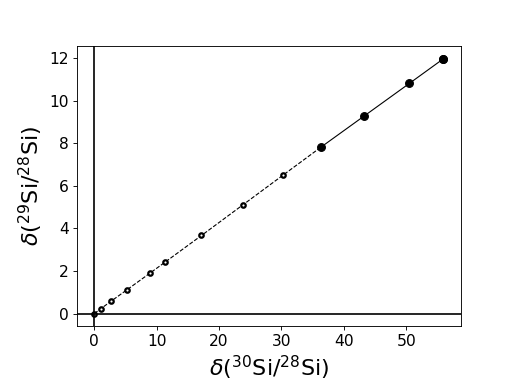

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used
in iniab.dat files
Plotting AGB star stuff
 reading ['iso_massf']...100%0.033472522078 0.0507771467932


In [52]:
# define isotopes for x and y axis
sixiso = ['Si-30','Si-28']
siyiso = ['Si-29','Si-28']
# make plot
ifig=12;figure(ifig)
m2pp.plot_isoratios(sixiso,siyiso,fign=ifig,spec='surf',iniabufile=iniabufile)

Here, the spec='surf' statement tells the routine that we are using surface data. The iniabufile, as defined in the preamble, gives it the solar system abundances.

We can also choose to plot nitrogen versus carbon isotopic ratios.

In [54]:
m2pp.plot_isoratios?

<IPython.core.display.Javascript object>


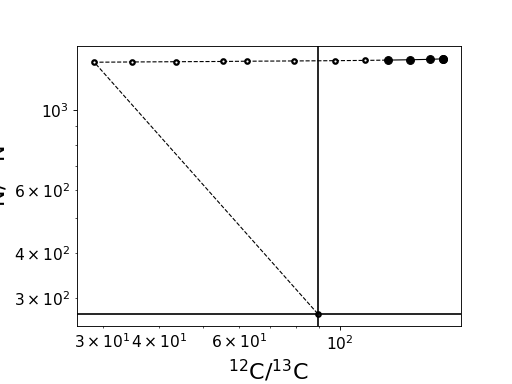

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used
in iniab.dat files
Plotting AGB star stuff
 reading ['iso_massf']...100%89.2690016261 272.000273006


In [55]:
ifig=13;figure(ifig)
m2pp.plot_isoratios(['C-12','C-13'],['N-14','N-15'],fign=ifig,deltax=False,deltay=False,logx=True,
                    logy=True,spec='surf',iniabufile=iniabufile)

Now models alone are fun, but it is much better if we can compare these models with presolar grain data. Let us first load the presolar grain database from St. Louis. Again, since we are online, we need to specify the proper path where the data is as well as load the proper solar system abundance file (both defined above).

In [57]:
# import the class
from nugridpy import grain
# load an instance g that contains all grain data
g = grain.gdb(gdbdir=fol2gdb,iniabufile=iniabufile)

Reading in... this takes a little bit
This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used
in iniab.dat files


A simple way of knowing what is in the database can be done by running g.info(). Let's try:

In [58]:
g.info()

There are 20789 grains in your database.

Available graintypes are:
-------------------------
['M', 'U', 'AB', 'X', 'Y', 'Z', 'C', 'N', '', 'HM only', 'X ', 'HD', 'LD', 'Si3N4']

Available groups of grains (for silicates and oxides) are:
----------------------------------------------------------
['', '1.0', '4.0', '2.0', '3.0', 'U']

Available Phases of grains are:
----------------------------------------------------------
['', 'Oxide', 'Oxygen-rich', 'Silicate']


That's a lot of grains. Let us filter out the mainstream grains to compare with the loaded two solar mass star.

In [59]:
g.filter_desc(graintype='M')

Let's check again if we have fewer grains with g.info()

In [60]:
g.info()

There are 14446 grains in your database.

Available graintypes are:
-------------------------
['M']

Available groups of grains (for silicates and oxides) are:
----------------------------------------------------------
['']

Available Phases of grains are:
----------------------------------------------------------
['']


Filters can always be reset by selecting g.reset_filter()

In [61]:
g.reset_filter()
g.info()

There are 20789 grains in your database.

Available graintypes are:
-------------------------
['M', 'U', 'AB', 'X', 'Y', 'Z', 'C', 'N', '', 'HM only', 'X ', 'HD', 'LD', 'Si3N4']

Available groups of grains (for silicates and oxides) are:
----------------------------------------------------------
['', '1.0', '4.0', '2.0', '3.0', 'U']

Available Phases of grains are:
----------------------------------------------------------
['', 'Oxide', 'Oxygen-rich', 'Silicate']


Let us select some dataset to compare with zirconium isotopes. We want to use the mainstream grains that Barzyk et al. measured. Now we need to know how that is stored in the database.

In [62]:
g.filter_desc(graintype='M')
g.info(reference=True)

There are 14446 grains in your database.

Available graintypes are:
-------------------------
['M']

Available groups of grains (for silicates and oxides) are:
----------------------------------------------------------
['']

Available Phases of grains are:
----------------------------------------------------------
['']

References for grains:
----------------------
['Liu ApJ 2014', 'Alexander ApJ 1999', 'Alexander GCA 1993', 'Alexander GCA 1994', 'Alexander GCA 1995', 'Avila ApJ 2012', 'Barzyk MAPS 2007', 'Barzyk MAPS 2008', 'Gyngard LPSC 2006', 'Gyngard MetSoc 2006', 'Heck ApJ 2007', 'Heck ApJ 2009', 'Hoppe ApJ 1994', 'Hoppe ApJ 2010', 'Hoppe ApJ Letters 2012', 'Hoppe GCA 1996', 'Hoppe LPSC 1996', 'Huss GCA 1997', 'Huss MAPS 2007', 'Jennings LPSC 2002', 'Lyon LPSC 2006', 'Marhas ApJ 2008', 'Marhas LPSC 2007', 'Marhas MAPS 2007', 'Marhas Met Soc 2005', 'Nittler ApJ 2005', 'Nittler GCA 2003', 'Orthous-Daunay LPSC 2012', 'Savina GCA 2003', 'Virag GCA 1992', 'Wopenka LPSC 2010', 'Xu Metso

We can now filter for the refernece that we want

In [63]:
g.filter_desc(reference='Barzyk MAPS 2007')
g.info(reference=True)

There are 89 grains in your database.

Available graintypes are:
-------------------------
['M']

Available groups of grains (for silicates and oxides) are:
----------------------------------------------------------
['']

Available Phases of grains are:
----------------------------------------------------------
['']

References for grains:
----------------------
['Barzyk MAPS 2007']


As you can see, we don't need to apply the filter for mainstream grains again, since we did this already. So now all the grains in the database available are the Barzyk et al. (2007) grains.
Let us make some a Zr plot:

<IPython.core.display.Javascript object>


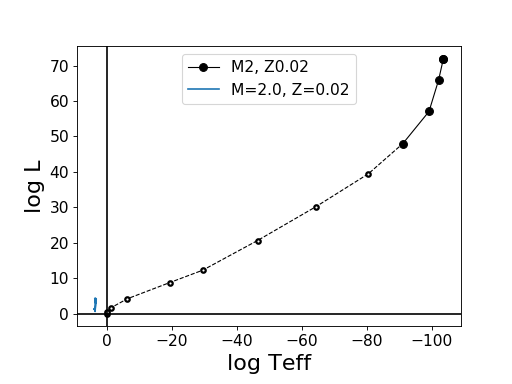

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used
in iniab.dat files
Plotting AGB star stuff
 reading ['iso_massf']...100%0.161047180669 0.986536248558


In [67]:
# define axis
zrxiso = ['Zr-96','Zr-94']
zryiso = ['Zr-92','Zr-94']
# plot the model data
ifig=14;figure(ifig)
m2pp.plot_isoratios(zrxiso,zryiso,fign=ifig,spec='surf',iniabufile=iniabufile,legend='M2, Z0.02',
                    plt_show=False)

Oh well, the model does not fit very well, but we could go back and check out the other models...

## Final remarks

This concludes the short tutorial on how to use NuGrid models and compare them to presolar grain data. I hope it is useful for many people.
Please have a look at the sphinx documentation at http://nugridpy.phys.uvic.ca and feel free to try out all the cool other stuff that is included in the routines. If you have questions, suggestions, comments (especially about the grain.py class), please send me a quick e-mail and I'm happy to look further into this.